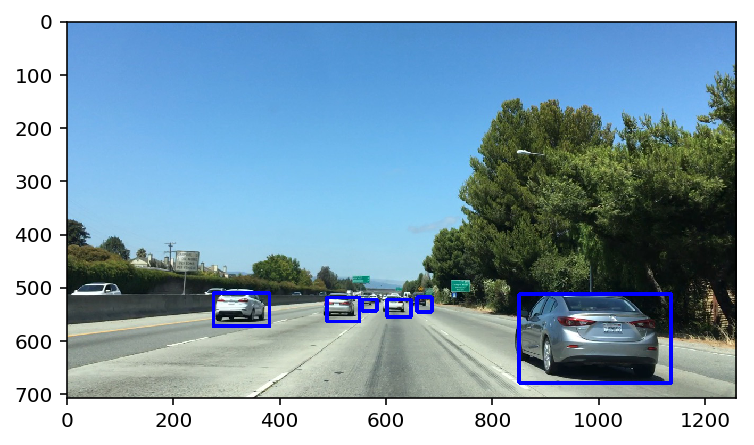

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

image = mpimg.imread('bbox-example-image.jpg')

# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    
    for bbox in bboxes:
        (x1, y1), (x2, y2) = bbox
        cv2.rectangle(draw_img, (x1, y1), (x2, y2), color, thick)
    
    
    # draw each bounding box on your image copy using cv2.rectangle()
    # return the image copy with boxes drawn
    return draw_img # Change this line to return image copy with boxes
# Add bounding boxes in this format, these are just example coordinates.
bboxes = [
        ((275, 572),(380, 510)), 
        ((488, 563), (549, 518)), 
        ((554, 543), (582, 522)), 
        ((601, 555), (646, 522)), 
        ((657, 545), (685, 517)), 
        ((849, 678), (1135, 512))]

result = draw_boxes(image, bboxes)
plt.imshow(result)

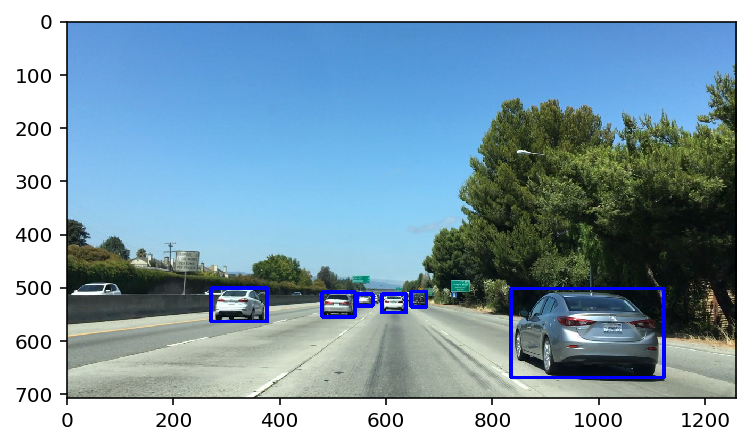

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')
templist = [
    'cutout1.jpg', 
    'cutout2.jpg', 
    'cutout3.jpg',
    'cutout4.jpg', 
    'cutout5.jpg', 
    'cutout6.jpg']

templist = ['cutouts/' + file for file in templist]

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    # Make a copy of the image to draw on
    # Define an empty list to take bbox coords
    bbox_list = []
    # Iterate through template list
    # Read in templates one by one
    # Use cv2.matchTemplate() to search the image
    #     using whichever of the OpenCV search methods you prefer
    # Use cv2.minMaxLoc() to extract the location of the best match
    # Determine bounding box corners for the match
    # Return the list of bounding boxes
    
    for file in template_list:
        method =  cv2.TM_SQDIFF_NORMED
        template = mpimg.imread(file)
        res = cv2.matchTemplate(img,template,method)    
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        top_left = max_loc
        h,w,_ = template.shape
        
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        bottom_right = (top_left[0] + w, top_left[1] + h)
        
        bbox_list.append((top_left,bottom_right))
    
    return bbox_list

bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)

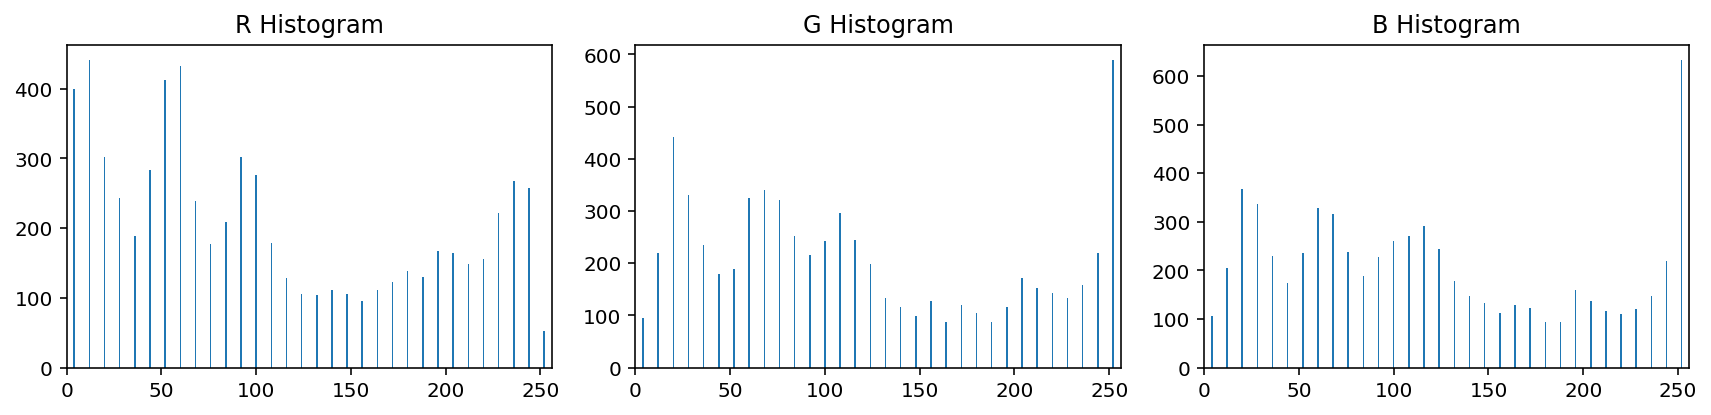

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('cutouts/cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
    ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
    bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

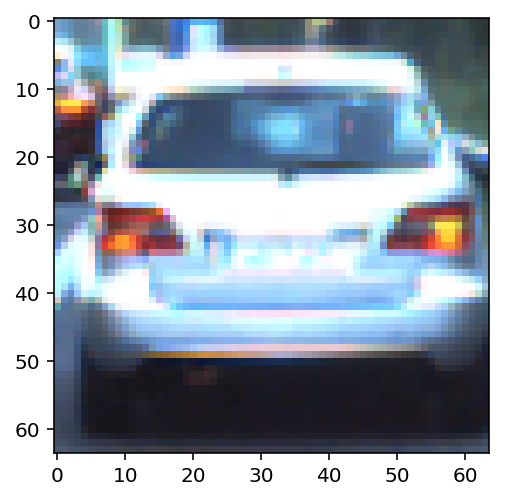

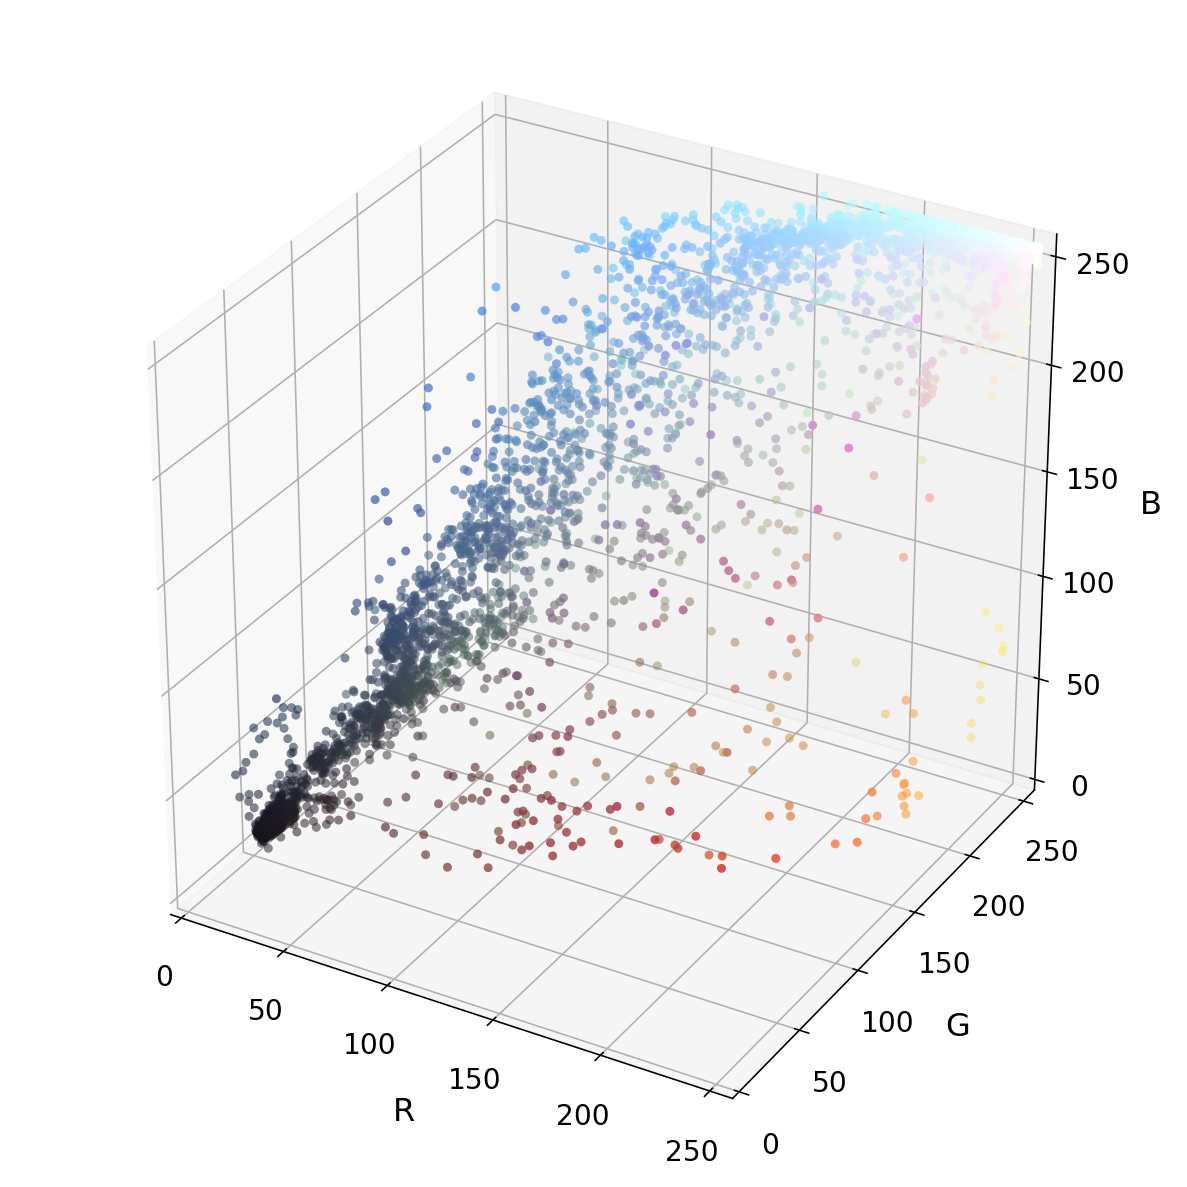

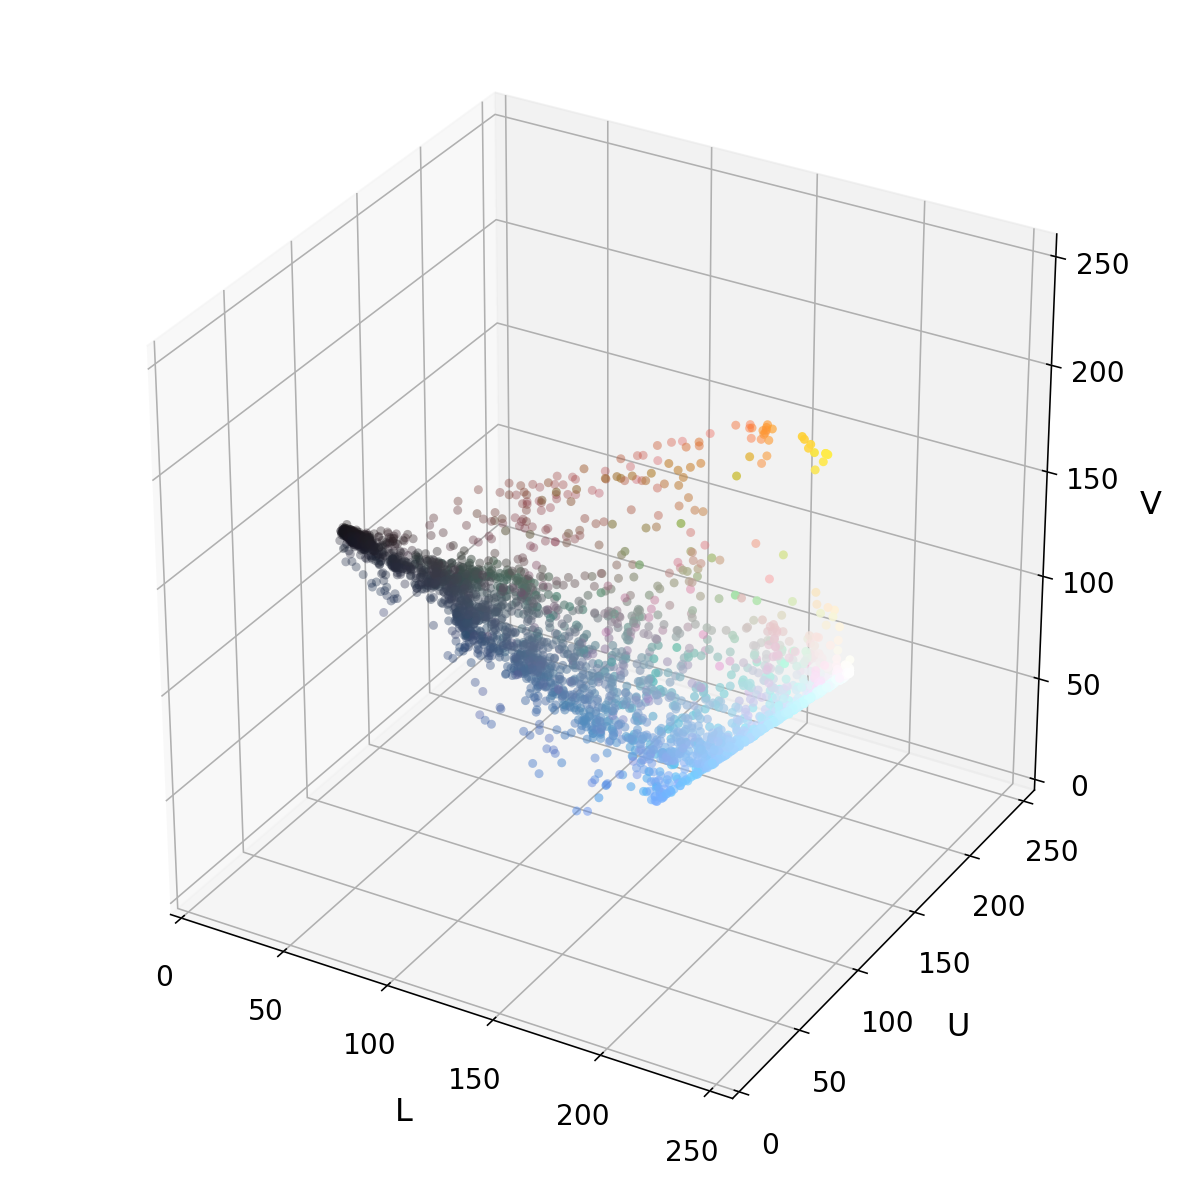

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


# Read a color image
original_img = cv2.imread("colors/31.png")
img = np.copy(original_img)

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.show()

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("LUV"))
plt.show()

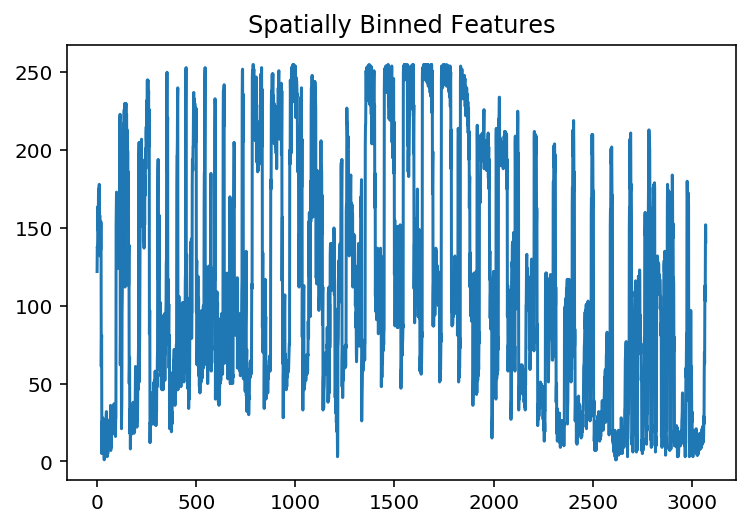

In [93]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in an image
# You can also read cutout2, 3, 4 etc. to see other examples
image = mpimg.imread('cutouts/cutout1.jpg')

# Define a function to compute color histogram features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
# KEEP IN MIND IF YOU DECIDE TO USE THIS FUNCTION LATER
# IN YOUR PROJECT THAT IF YOU READ THE IMAGE WITH 
# cv2.imread() INSTEAD YOU START WITH BGR COLOR!
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img) 
    
    
    small_img = cv2.resize(feature_image,size)
    features = small_img.ravel()
    # Convert image to new color space (if specified)
    # Use cv2.resize().ravel() to create the feature vector
    #features = img.ravel() # Remove this line!
    # Return the feature vector
    return features
    
feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')

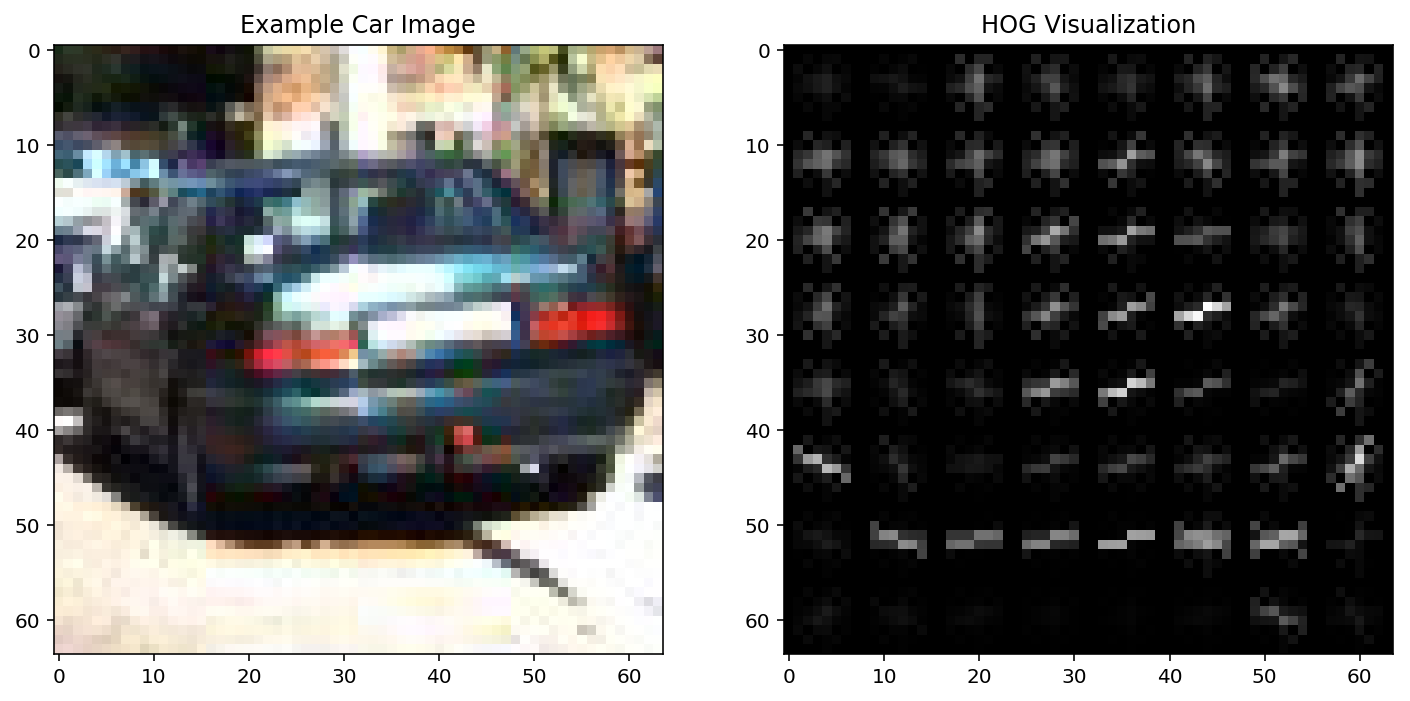

In [245]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog


def get_hog_features(
        img, 
        orient, 
        pix_per_cell, 
        cell_per_block, 
        vis=False, 
        feature_vec=True,
        transform_sqrt=False):
    if vis == True:
        features, hog_image = hog(
                        img, 
                        orientations=orient,
                        pixels_per_cell=(pix_per_cell, pix_per_cell), 
                        cells_per_block=(cell_per_block, cell_per_block), 
                        visualise=True, 
                        feature_vector=feature_vec,
                        block_norm="L2-Hys",
                        transform_sqrt = transform_sqrt)
        return features, hog_image
    
    else:      
        features = hog(
                        img, 
                        orientations=orient,
                        pixels_per_cell=(pix_per_cell, pix_per_cell), 
                        cells_per_block=(cell_per_block, cell_per_block), 
                        visualise=False, 
                        feature_vector=feature_vec,
                        block_norm="L2-Hys",
                        transform_sqrt = transform_sqrt)
        return features
    
    


images = glob.glob('data/*smallset/*/*.jpeg')

cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
        
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters

orient = 9
pix_per_cell = 8
cell_per_block = 1

# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(
                        gray, 
                        orient, 
                        pix_per_cell, 
                        cell_per_block, 
                        vis=True, 
                        feature_vec=False,
                        transform_sqrt=False)


# Plot the examples
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')



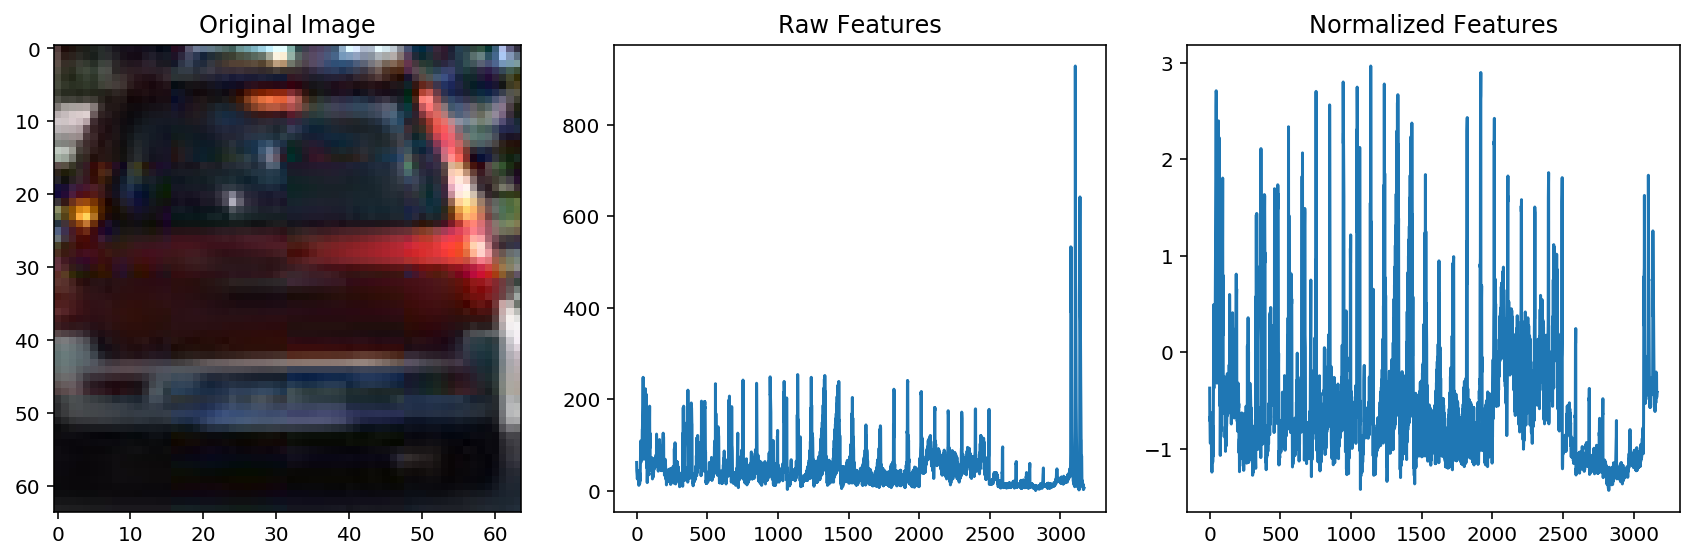

In [104]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

###### TODO ###########
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    for file in imgs:
        img = mpimg.imread(file)
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(img)
            
        spatial_features = bin_spatial(feature_image, size = spatial_size)
        
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        
        concatenated_features = np.concatenate((spatial_features, hist_features))
        
        features.append(concatenated_features)
        
    # Iterate through the list of images
        # Read in each one by one
        # apply color conversion if other than 'RGB'
        # Apply bin_spatial() to get spatial color features
        # Apply color_hist() to get color histogram features
        # Append the new feature vector to the features list
    # Return list of feature vectors
    return features

images = glob.glob('data/*smallset/*/*.jpeg')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)   
    
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

images = glob.glob('data/*smallset/*/*.jpeg')
cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
spatial = 16
histbin = 64        

car_features = extract_features(cars, cspace='RGB', spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))

notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))

y = np.hstack((np.ones(len(car_features)), 
              np.zeros(len(notcar_features))))

X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)


svc = LinearSVC()
# Train the SVC
svc.fit(X_train, y_train)

print('Test Accuracy of SVC = ', svc.score(X_test, y_test))



print('My SVC predicts: ', svc.predict(X_test[0:10].reshape(10, -1)))
print('For labels: ', y_test[0:10])

Test Accuracy of SVC =  0.993548387097
My SVC predicts:  [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  1.]
For labels:  [ 1.  1.  0.  0.  0.  1.  0.  0.  0.  1.]


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

images = glob.glob('data/*smallset/*/*.jpeg')
cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
        
def extract_features(
        imgs, 
        cspace='RGB', 
        orient=9, 
        pix_per_cell=8, 
        cell_per_block=2, 
        hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    
    for file in imgs:
        img = mpimg.imread(file)
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(img)
            
              # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(
                                        feature_image[:,:,channel], 
                                        orient, 
                                        pix_per_cell, 
                                        cell_per_block, 
                                        vis=False, 
                                        feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(
                            feature_image[:,:,hog_channel], 
                            orient, 
                            pix_per_cell, 
                            cell_per_block, 
                            vis=False, 
                            feature_vec=True)
            
        features.append(hog_features)
            
    return features


colorspace = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

      
car_features = extract_features(
                        cars, 
                        cspace=colorspace, 
                        orient=orient, 
                        pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)

notcar_features = extract_features(
                        notcars, 
                        cspace=colorspace, 
                        orient=orient, 
                        pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)

y = np.hstack((np.ones(len(car_features)), 
              np.zeros(len(notcar_features))))

X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)


svc = LinearSVC()
# Train the SVC
svc.fit(X_train, y_train)

print('Test Accuracy of SVC = ', svc.score(X_test, y_test))
print('My SVC predicts: ', svc.predict(X_test[0:10].reshape(10, -1)))
print('For labels: ', y_test[0:10])

Test Accuracy of SVC =  0.965591397849
My SVC predicts:  [ 1.  1.  0.  1.  0.  0.  0.  0.  1.  0.]
For labels:  [ 1.  1.  0.  1.  0.  0.  0.  0.  1.  0.]


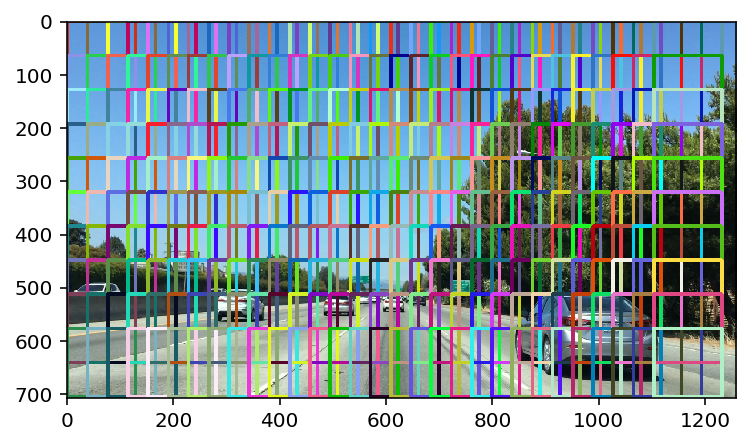

In [250]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

image = mpimg.imread('bbox-example-image.jpg')

def component():
  return random.randint(0,255)

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], (component(),component(),component()), thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    # Compute the span of the region to be searched    
    # Compute the number of pixels per step in x/y
    # Compute the number of windows in x/y
    # Initialize a list to append window positions to
    
    # If x and/or y start/stop positions not defined, set to image size
    
    x_min = x_start_stop[0] or 0
    y_min = y_start_stop[0] or 0
    
    x_max = x_start_stop[1] or img.shape[1]
    y_max = y_start_stop[1] or img.shape[0]
    
    x_offset = np.int(xy_window[0] * (1 - xy_overlap[0]))
    y_offset = np.int(xy_window[1] * (1 - xy_overlap[1]))
    
    x_width = xy_window[0]
    y_width = xy_window[1]
     
    window_list = []
    
    x_start = x_min
    
    while x_start + x_width <= x_max:
        
        x_stop = x_start + x_width    
        y_start = y_min
        
        while y_start + y_width <= y_max:           
            y_stop = y_start +  y_width
            
            window_list.append((
                (x_start, y_start),
                (x_stop, y_stop)
            ))
            
            y_start = y_start + y_offset
        
        x_start = x_start + x_offset
    
    return window_list


windows = slide_window(
            image, 
            x_start_stop=[None, None], 
            y_start_stop=[None, None], 
            xy_window=(128, 128), 
            xy_overlap=(0.7, 0.5))

window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)  

plt.imshow(window_img)


In [246]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]